# An Introduction to the Discrete Fourier Transform

# Lecture 1: Solutions


## The following is the SOLUTIONS to the exercises for the first lecture on the Discrete Fourier Transform. 

### The two text files "piano.txt" and "trumpet.txt" are files from the book "Computational Physics" by Mark Newman. More infomation [here](http://www-personal.umich.edu/~mejn/cp/). 

### The "piano.wav" file is synthesized by one of my students Lukas Maldonadowerk.

## Exercises

### Many of these problems are done in Lecture 1's video. Consult the video if you're having trouble with these problems.


#### Press Shift-Enter to run each cell. 

In [1]:
# run this cell to import some libraries.
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib notebook

#### We take for granted that all digital data on the computer: text, images, sound and videos are simply strings of 0's and 1'. 

#### Use `np.loadtxt(filename)` to import `trumpet.txt` and load into an array `ys`. This array is simply a list of numbers. You can examine the list of numbers by slicing. For example `print(ys[0:10]`), prints the first 10 numbers.

```python
ys = np.loadtxt("trumpet.txt")
Audio(ys, rate = 44100)
```

In [4]:
ys = np.loadtxt("trumpet.txt")
print(ys[:20])

[-2. -5. -1. -6.  0. -3. -3. -4.  0. -4. -1. -3. -1. -4.  3. -5.  0. -3.
 -2.  1.]


#### Yet we can programmatically tell our speakers to vibrate according to those numbers and create sound! Create an Audio object with the data from the text file at the sampling rate `44100` Hz. Play the audio.


In [5]:
Audio(ys, rate = 44100)

#### Note: Behind the scenes, to faithfully produce the sound above, your computer speakers have to move 44100 times a second dictated by the list of numbers! The movement of the diaphragm in the speaker causes air to vibrate producing the sound. 

#### Create and initialized the variables `N`, the number of samples, `fs`, the sampling rate and `L` the length of the audio in seconds.

#### Use ys.size to get the number of samples.

In [6]:
N = ys.size
fs = 44100
L = N/fs


In [9]:
print(N, fs, L)

100000 44100 2.2675736961451247


#### Use `np.linspace(start, stop, num samples)` to create array of $N$ time samples `ts` for the time interval $[0,L]$. The array `ts` is the domain of our sound wave. The array `ys` is the outputs or values of the sound wave. 

In [10]:
ts = np.linspace(0, L, N)

#### Use `matplotlib` to plot the waveform of the trumpet recording. We are plotting `ys` as a function of `ts`. Use `ax.set_xlim(x1, x2)` to zoom in. 

```python
fig, ax = plt.subplots()
ax.plot(ts, ys)
```

(0, 0.05)

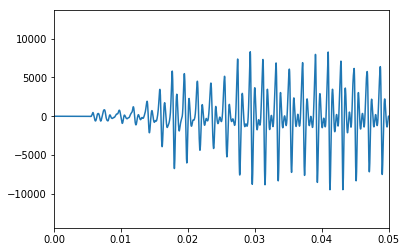

In [12]:
fig, ax = plt.subplots()
ax.plot(ts, ys)
ax.set_xlim(0,.05) # waveform for the first interval [0, 0.05] seconds of the recording.

#### Now use `np.fft.fft(samples)` to convert the samples to Fourier coefficients and store the result in the variable `yk`. (Since `ys` contains 100000 samples, we expect `yk` to contain N = 100000 Fourier coefficients.) 

#### Use np.arange(N) to create an array of integers $k=0,1,2,...,N-1$. Store in variable `k`. Then create the array of frequencies(harmonics) $f_k$ that the DFT will detect. $f_k=k/L$ where $k = 0,1,2...,N-1$. (The array `fk` contains 100000 frequencies. These are the frequencies that the DFT can detect.)

### We will go into details on these concepts later. For now, we just want some intuition for what the DFT(FFT) does. 


In [13]:
yk = np.fft.fft(ys)
k = np.arange(N)
fk = k/L

#### Use `fk[:10]` to print out the first 10 harmonics that the DFT will detect. What is the fundamental frequency?

### Answer: 0.441 Hz.

In [14]:
fk[:10]

array([0.   , 0.441, 0.882, 1.323, 1.764, 2.205, 2.646, 3.087, 3.528,
       3.969])

#### Now plot the frequency domain representation (frequencies $f_k$ vs magnitude of Fourier coefficients). Use `np.abs(fk)` to compute magnitudes of the Fourier coefficients.

#### What note did the trumpet play? What are the harmonics? You may use the interactive feature of the matplotlib graph to estimate these values. Use `ax.set_xlim(0, 4000)` to zoom in to the first 4000 Hz.

####  The following website of notes/frequencies will be helpful. 
http://pages.mtu.edu/~suits/notefreqs.html

(0, 4000)

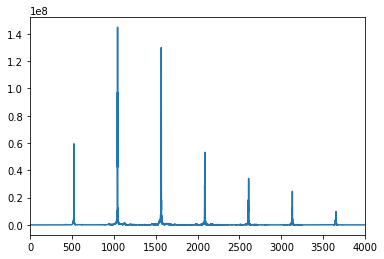

In [15]:
fig, ax = plt.subplots()
ax.plot(fk, np.abs(yk))
ax.set_xlim(0,4000)

### Answer: By looking at the graph above, approximately a little over 500 Hz, a C5. Later in this problem set, we can compute this exactly.

#### As in the lecture, collecting the above code, we can write the function `plot_signal_time` to plot the waveform as a function of time. 
#### Run the cell below. Then call the function to plot the waveform of the trumpet. Zoom in. 

In [16]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    """ plots the signal ys on the time domain [t2, t2] 
    at the sampling rate fs. 
    """
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")


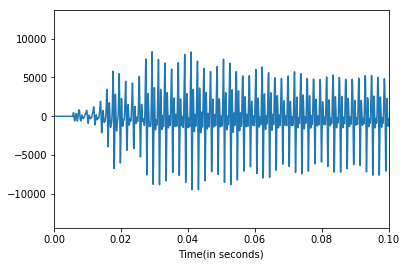

In [17]:
# call plot_signal_time to plot the waveform of a trumpet. 
plot_signal_time(ys,0,0.1)

#### Write the function `plot_signal_frequency` to plot the spectrum of the signal. This code is similar to the code from the function `plot_signal_time` above. 

In [18]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")
    return ax
    

#### Run the cell above. Then call the function `plot_signal_frequency` to plot the waveform of the trumpet. Zoom in. 

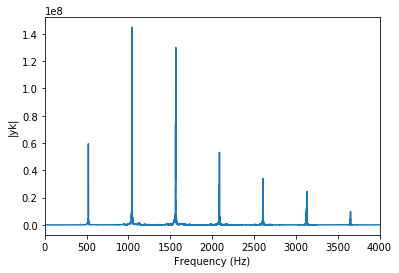

In [19]:
plot_signal_frequency(ys,0,4000)

#### Import `piano.txt` and use `plot_signal_frequency` above to plot the magnitudes of the Fourier coefficients. Compare this frequency domain of the trumpet to that of the piano. 


In [20]:
ys1 = np.loadtxt("piano.txt")
L1 = ys1.size/fs
Audio(ys1, rate = 44100)

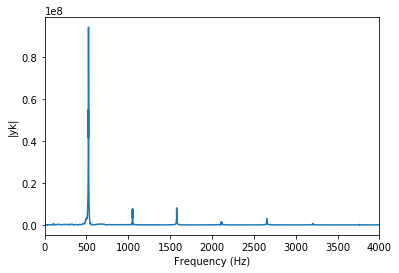

In [21]:
plot_signal_frequency(ys1,0,4000)

#### Note that the harmonics for the trumpet has many harmonics of high frequencies. For the piano, the dominant harmonic is the fundamental harmonic.

## The next set of problems is a little more challenging. 

#### We used the interactive feature of matplotlib to estimate the fundamental frequency and its harmonics. Now use Python code to find the fundamental frequency exactly of the PIANO recording. Hint: Compute the Fourier coefficients. Use `np.argsort(array)` to sort an array. This function returns the indices that would sort the array. The formula $f_k=k/L$ will be useful. 

In [23]:
N1 = ys1.size
yk1 = np.fft.fft(ys1)
np.argsort(np.abs(yk1))

array([65645, 34355, 64600, ...,  1188, 98810,  1190])

In [24]:
1190/L1 

524.79

### Thus, the piano recording is a C5 = 524 Hz.

#### Find the most dominant(largest Fourier coefficient magnitude) frequency in the TRUMPET recording. 

In [25]:
np.argsort(np.abs(yk))

array([48391, 51609, 48346, ...,  3551, 97633,  2367])

In [26]:
2367/L

1043.847

#### Find the fundamental frequency in the TRUMPET recording. 

### Note that 1043 Hz is the most dominant but not the fundamental frequency of the trumpet sound.

### Use slicing to only consider frequencies less than 1043 Hz and sort this sublist.

In [43]:
np.argsort(np.abs(yk[:2000]))

array([   8,   50,   53, ..., 1182, 1184, 1183])

In [44]:
1183/L

521.703

#### Fundamental frequency of the trumpet is 521 Hz. 

### The fundamental frequency is thus also a C5 the same as the piano recording.

#### The previous examples read the data from text files. Let's do an example of reading in an audio file. 

#### Use the `read(filename)` function from the `wavfile` module to read in "piano.wav". 
```python
fs, ys = wavfile.read("file.wav")
```

In [27]:
fs, ys = wavfile.read("piano.wav")


#### Play the audio file and plot the frequencies and determine chord of the piano recording. 

In [33]:
Audio(ys, rate = fs)

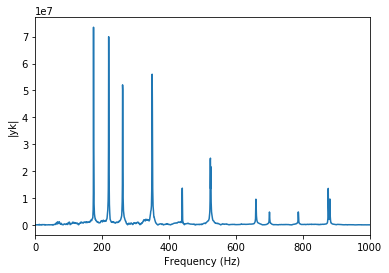

In [29]:
plot_signal_frequency(ys, 0, 1000)

#### Sort the Fourier coefficient magnitudes using np.argsort and look at the top four most dominant frequencies. Use $f_k = k/L$ to find the frequencies. 

#### The following website of notes/frequencies will be helpful. 
http://pages.mtu.edu/~suits/notefreqs.html

In [30]:
yk = np.fft.fft(ys)

In [31]:
N = ys.size
L = N/fs

In [32]:
indices = np.argsort(np.abs(yk))
indices

array([41296, 40543, 28827, ...,   408, 81515,   324])

In [58]:
324/L  # 174 Hz is F3

174.59157614340353

In [65]:
indices[-10:] # last 10 indices(largest Fourier coefficient magnitude)

array([  486, 81353,   485, 81354, 81190,   649, 81431,   408, 81515,
         324])

In [62]:
408/L # 220 Hz is A3

219.85605884724887

In [61]:
649/L # 350 Hz is F4

349.72201517613854

In [63]:
485/L # 261 Hz is C4

261.3485013257738

### F, A, C is an F major chord. We just mathematically determined that an piano recording is an F major! Note above that there are some very high indices. In later lectures, we learn that the frequency spectrum of a sound is symmetric. Those higher frequencies are simply the negative version of the ones we just picked out.